In [ ]:
import os
import sys
sys.path.append('..')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# libraries

In [ ]:
import pickle
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import math

# load data

In [ ]:
path = '../content/drive/MyDrive/wifi_project/2021_08_09-00_52_27_modified.csv'
# data = pd.read_csv(path).iloc[:,1:]
data = pd.read_csv(path).iloc[:,1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   x                  34780 non-null  int64  
 1   y                  34780 non-null  int64  
 2   date_time          34780 non-null  object 
 3   00:1f:fb:ea:46:d9  30520 non-null  float64
 4   3a:f6:43:0d:98:00  5340 non-null   float64
 5   44:d9:e7:09:ca:66  31640 non-null  float64
 6   44:d9:e7:09:ca:c7  2740 non-null   float64
 7   44:d9:e7:09:ca:cd  33880 non-null  float64
 8   44:d9:e7:09:cd:e1  1140 non-null   float64
 9   44:d9:e7:09:ce:21  560 non-null    float64
 10  44:d9:e7:09:ce:49  360 non-null    float64
 11  44:d9:e7:09:ce:9a  33840 non-null  float64
 12  44:d9:e7:09:cf:39  32600 non-null  float64
 13  44:d9:e7:43:3d:fa  25760 non-null  float64
 14  46:d9:e7:09:ca:66  27620 non-null  float64
 15  46:d9:e7:09:ca:c7  2300 non-null   float64
 16  46:d9:e7:09:ca:cd  287

In [ ]:
def get_tile_number(x, y):
    if 0<=x<=420 and 0<=y<=180:
      return 1
    elif 480<=x<=780 and 240<=y<=720:
      return 2
    elif 480<=x<=780 and 0<=y<=180:
      return 3
    elif 840<=x<=1380 and 0<=y<=180:
      return 4
    elif 1440<=x<=2340 and 0<=y<=180:
      return 5

In [ ]:
X = data.drop(['x','y'], axis = 1)
y = data[['x','y']]
data['label'] = y.apply(lambda x:get_tile_number(x.x, x.y), axis=1)
# data = pd.concat([X, y], axis=1).drop_duplicates()

In [ ]:
data.describe()

,x,y,44:d9:e7:09:ca:66,44:d9:e7:09:ca:cd,44:d9:e7:09:ce:9a,44:d9:e7:09:cf:39,44:d9:e7:43:3d:fa,46:d9:e7:09:ca:66,46:d9:e7:09:ca:cd,46:d9:e7:09:ce:9a,46:d9:e7:09:cf:39,zone
count,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000,34620.000000,34780.000000,34780.000000,34780.000000,34780.000000,34780.000000
mean,1037.975848,187.797585,-64.856268,-47.141173,-41.860466,-62.486544,-77.654362,-65.236429,-47.085221,-42.328148,-62.901783,3.243818
std,649.840423,194.558756,6.473697,5.675226,7.585028,5.866237,3.362017,6.251316,5.291523,7.378840,5.870642,1.480704
min,0.000000,0.000000,-80.000000,-66.000000,-68.000000,-80.000000,-88.000000,-80.000000,-65.000000,-67.000000,-83.000000,1.000000
25%,540.000000,60.000000,-70.000000,-51.000000,-47.000000,-67.000000,-80.000000,-70.000000,-50.000000,-48.000000,-67.000000,2.000000
50%,780.000000,120.000000,-66.000000,-47.000000,-43.000000,-63.000000,-77.000000,-66.000000,-47.000000,-43.000000,-64.000000,3.000000
75%,1560.000000,180.000000,-60.000000,-43.000000,-36.000000,-59.000000,-75.000000,-61.000000,-43.000000,-37.000000,-59.000000,5.000000
max,2340.000000,720.000000,-44.000000,-5.000000,-5.000000,-42.000000,-67.000000,-44.000000,-30.000000,-5.000000,-43.000000,5.000000


In [ ]:
#(print the number of rows and columns).
num_rows, num_cols  = data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 25
Number of rows: 34780


In [ ]:
#Check the columns names
col_names = data.columns.values
col_names

array(['x', 'y', 'date_time', '00:1f:fb:ea:46:d9', '3a:f6:43:0d:98:00',
       '44:d9:e7:09:ca:66', '44:d9:e7:09:ca:c7', '44:d9:e7:09:ca:cd',
       '44:d9:e7:09:cd:e1', '44:d9:e7:09:ce:21', '44:d9:e7:09:ce:49',
       '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39', '44:d9:e7:43:3d:fa',
       '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:c7', '46:d9:e7:09:ca:cd',
       '46:d9:e7:09:cd:e1', '46:d9:e7:09:ce:21', '46:d9:e7:09:ce:49',
       '46:d9:e7:09:ce:9a', '46:d9:e7:09:cf:39', '46:d9:e7:43:3d:fa',
       'b8:76:3f:5a:77:4f', 'label'], dtype=object)

In [ ]:
#check for missing values
missing_values_count = data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 45.00977573317999%


In [ ]:
# حذف اکسس پوینت هایی که دیتای زیادی از آن جمع آوری نشده است
for col in data.columns:
  if data[col].isna().sum() > data.shape[0]//2.5: data.drop(col, axis=1, inplace=True)
print(data.shape)
print(data.columns)

(34780, 14)
Index(['x', 'y', 'date_time', '00:1f:fb:ea:46:d9', '44:d9:e7:09:ca:66',
       '44:d9:e7:09:ca:cd', '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39',
       '44:d9:e7:43:3d:fa', '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:cd',
       '46:d9:e7:09:ce:9a', '46:d9:e7:09:cf:39', 'label'],
      dtype='object')


In [ ]:
data.isnull().sum()

x                        0
y                        0
date_time                0
00:1f:fb:ea:46:d9     4467
3a:f6:43:0d:98:00    29580
44:d9:e7:09:ca:66     8535
44:d9:e7:09:ca:c7    33318
44:d9:e7:09:ca:cd     1812
44:d9:e7:09:cd:e1    34068
44:d9:e7:09:ce:21    34457
44:d9:e7:09:ce:49    34613
44:d9:e7:09:ce:9a     1613
44:d9:e7:09:cf:39     4023
44:d9:e7:43:3d:fa    18655
46:d9:e7:09:ca:66    16852
46:d9:e7:09:ca:c7    33457
46:d9:e7:09:ca:cd    13444
46:d9:e7:09:cd:e1    34049
46:d9:e7:09:ce:21    34663
46:d9:e7:09:ce:49    34668
46:d9:e7:09:ce:9a    12531
46:d9:e7:09:cf:39    12806
46:d9:e7:43:3d:fa    23384
b8:76:3f:5a:77:4f    34573
label                    0
dtype: int64

In [ ]:
data = data.fillna(-100)
data = data.replace(-100, np.nan)
# X = X.fillna(-100)

In [ ]:
# حذف اکسس پوینت هایی که دیتای زیادی از آن جمع آوری نشده است
cut_factor = 1.2  # grater value removes more columns
th = data.shape[0]//cut_factor
data = data.fillna(-100)

for col in data.columns:
#   if data[col].isna().sum() >  th: data.drop(col, axis=1, inplace=True)
    try:
        if data[col].value_counts().get(-100) > th: data.drop(col, axis=1, inplace=True)
    except:
        pass

print(data.shape)
print(data.columns)

(34780, 15)
Index(['x', 'y', 'date_time', '00:1f:fb:ea:46:d9', '44:d9:e7:09:ca:66',
       '44:d9:e7:09:ca:cd', '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39',
       '44:d9:e7:43:3d:fa', '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:cd',
       '46:d9:e7:09:ce:9a', '46:d9:e7:09:cf:39', '46:d9:e7:43:3d:fa', 'label'],
      dtype='object')


In [ ]:
data = data.drop('00:1f:fb:ea:46:d9', axis = 1)

In [ ]:
X = data.drop(['x','y'], axis = 1)
y = data[['x','y']]
data['label'] = y.apply(lambda x:get_tile_number(x.x, x.y), axis=1)
# data = pd.concat([X, y], axis=1).drop_duplicates()

In [ ]:
data = pd.concat([X, y], axis=1).drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 34760
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          17703 non-null  object 
 1   44:d9:e7:09:ca:66  17703 non-null  float64
 2   44:d9:e7:09:ca:cd  17703 non-null  float64
 3   44:d9:e7:09:ce:9a  17703 non-null  float64
 4   44:d9:e7:09:cf:39  17703 non-null  float64
 5   44:d9:e7:43:3d:fa  17703 non-null  float64
 6   46:d9:e7:09:ca:66  17703 non-null  float64
 7   46:d9:e7:09:ca:cd  17703 non-null  float64
 8   46:d9:e7:09:ce:9a  17703 non-null  float64
 9   46:d9:e7:09:cf:39  17703 non-null  float64
 10  46:d9:e7:43:3d:fa  17703 non-null  float64
 11  x                  17703 non-null  int64  
 12  y                  17703 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 1.9+ MB


# counting number of null values

In [ ]:
def value_count(column, value):
    # counts how many rows in "column" are equal to "value"
    # inputs:
        # "column" is a pandas Series
        # "value" any valueی
    try:
        return column.value_counts()[value]
    except:
        return 0

In [ ]:
X_new = data.drop(['x', 'y','label','00:1f:fb:ea:46:d9', '3a:f6:43:0d:98:00', 'date_time'], axis=1)
Y_new = data[['x', 'y']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


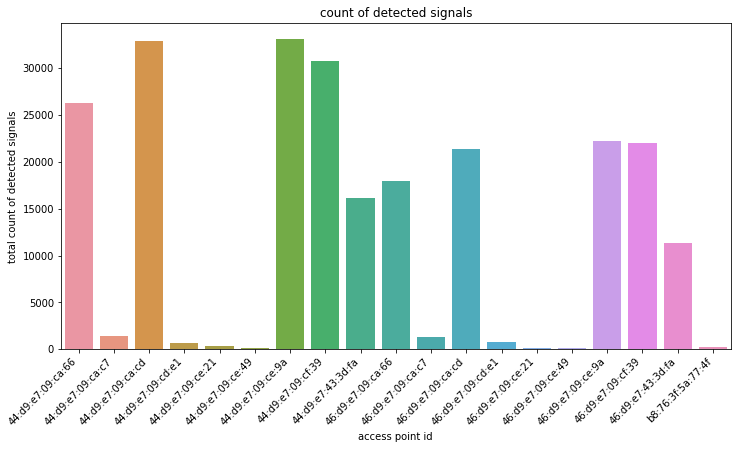

In [ ]:
counter_no_signal = {col: X_new[col].notnull().sum() for col in X_new.columns}
plt.figure(figsize=(12, 6))
plt.title ("count of detected signals")
plt.xlabel('access point id')
plt.ylabel('total count of detected signals')
sns.barplot(list(counter_no_signal.keys()), list(counter_no_signal.values()))
plt.xticks(rotation=45, ha='right')
plt.show()

# samples in each location

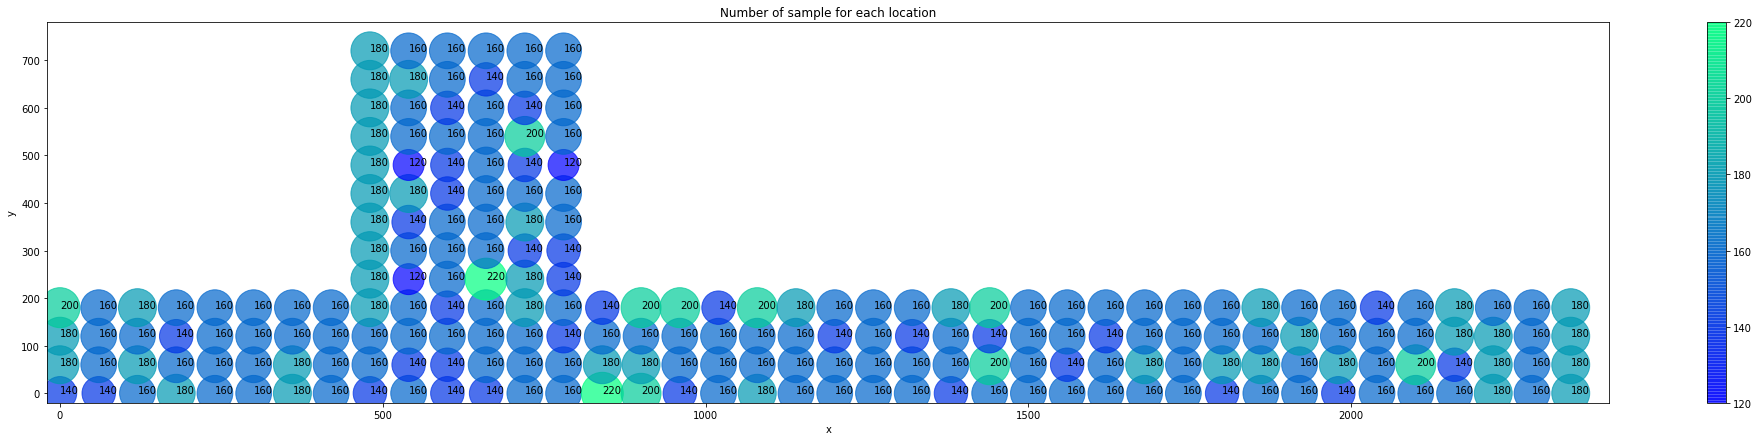

In [ ]:
scatter_with_size_data = Y_new.groupby(['x', 'y']).size().reset_index().rename(columns = {0:'size_'})
plt.figure(figsize=(35, 7))
plt.title ("Number of sample for each location")
plt.xlim([-20, 2400])
plt.ylim([-20, 780])
plt.xlabel('x')
plt.ylabel('y')
x = scatter_with_size_data.x
y = scatter_with_size_data.y
size = scatter_with_size_data.size_
plt.scatter(x, y, s=size*8, alpha=0.7, cmap='winter', c=size)
for i, txt in enumerate(list(size)):
    plt.annotate(txt, (x[i], y[i]))
plt.colorbar()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

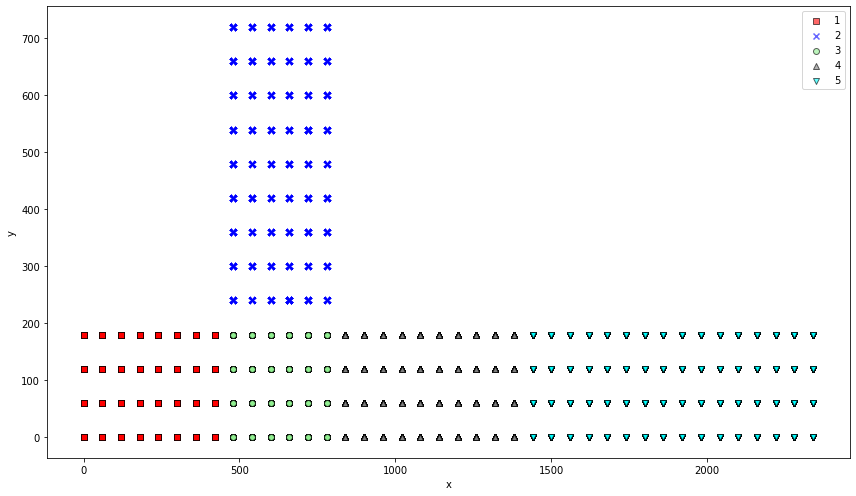

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize = (12, 7))
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(data['label']))])

for idx, cl in enumerate(np.unique(data['label'])):
        plt.scatter(x=data.loc[data.label== cl]['x'], 
                    y=data.loc[data.label== cl]['y'],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.tight_layout()


# Investigation of changes in received signal strength

In [ ]:
data.columns

Index(['x', 'y', 'date_time', '44:d9:e7:09:ca:66', '44:d9:e7:09:ca:cd',
       '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39', '44:d9:e7:43:3d:fa',
       '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:cd', '46:d9:e7:09:ce:9a',
       '46:d9:e7:09:cf:39', '46:d9:e7:43:3d:fa', 'label'],
      dtype='object')

In [ ]:
data = data.fillna(-100)

In [ ]:
columns = list(data.columns)
columns_ap = [item for item in columns if item[3:5]=='d9' or item == 'date_time']
X = data[columns_ap]
y = data[['x','y']]
df_test = pd.concat([X, y], axis=1)

In [ ]:
df_test = df_test.set_index(df_test['date_time']).drop('date_time', axis = 1)

In [ ]:
df_test = df_test.sort_index()

In [ ]:
a = df_test[df_test['x'] ==0]
df = a[a['y'] == 0]

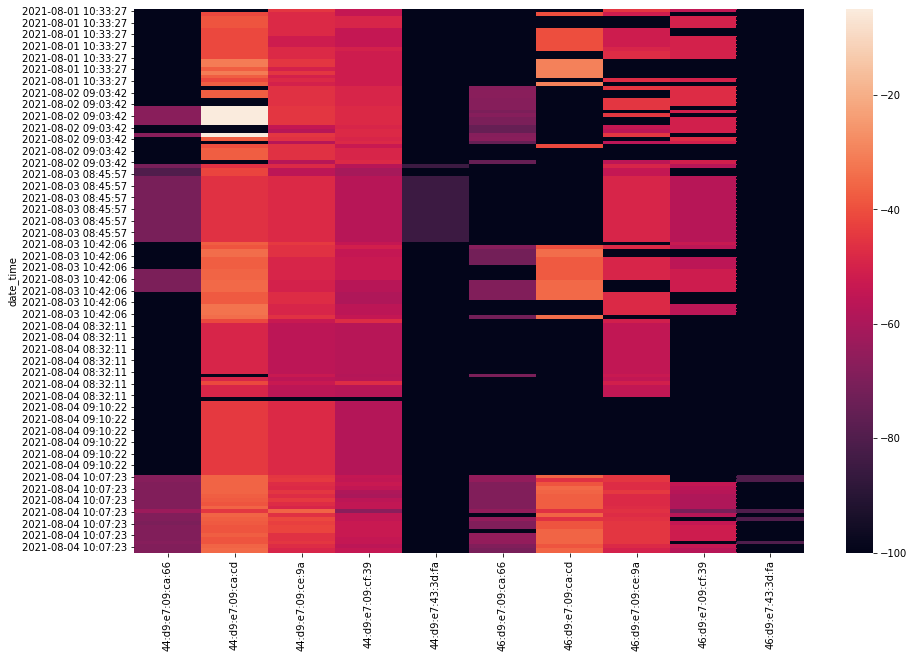

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sns.heatmap(df.drop(['x','y'], axis = 1))

In [ ]:
columns = list(data.columns)
columns_ap = [item for item in columns if item[3:5]=='d9' or item == 'date_time']
X = data[columns_ap]
y = data[['x','y']]
df_test = pd.concat([X, y], axis=1))

In [ ]:
df_test = data.set_index(data['date_time'])
df_test = df_test.sort_index()

In [ ]:
date_time = pd.to_datetime(df_test['date_time'])
df_test['month'] = date_time.dt.month
df_test['day'] = date_time.dt.day
df_test = df_test[df_test['month']==8]
p = df_test[df_test['day']==3]
q = df_test[df_test['day']==4]
df = pd.concat([p,q], ignore_index= True).drop_duplicates()

In [ ]:
df.columns

Index(['x', 'y', 'date_time', '44:d9:e7:09:ca:66', '44:d9:e7:09:ca:cd',
       '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39', '44:d9:e7:43:3d:fa',
       '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:cd', '46:d9:e7:09:ce:9a',
       '46:d9:e7:09:cf:39', '46:d9:e7:43:3d:fa', 'label', 'month', 'day'],
      dtype='object')

In [ ]:
data = data.replace(-100, np.nan)

In [ ]:
data.isnull().sum()

x                        0
y                        0
date_time                0
44:d9:e7:09:ca:66     8535
44:d9:e7:09:ca:cd     1812
44:d9:e7:09:ce:9a     1613
44:d9:e7:09:cf:39     4023
44:d9:e7:43:3d:fa    18655
46:d9:e7:09:ca:66    16852
46:d9:e7:09:ca:cd    13444
46:d9:e7:09:ce:9a    12531
46:d9:e7:09:cf:39    12806
46:d9:e7:43:3d:fa    23384
label                    0
dtype: int64

In [ ]:
data = data.fillna(-100)

In [ ]:
a = df[df['x'] ==1740]
b = a[a['y'] == 60]

In [ ]:
date = list(df['date_time'])
date

In [ ]:
x_0 = data[data['x']==0]
y_0 = x_0[x_0['y'] == 120][['44:d9:e7:09:ce:9a']]
x_1 = data[data['x']==540]
y_1 = x_1[x_1['y'] == 240][['44:d9:e7:09:ce:9a']]
x_2 = data[data['x']==660]
y_2 = x_2[x_2['y'] == 600][['44:d9:e7:09:ce:9a']]
x_3 = data[data['x']==1080]
y_3 = x_3[x_3['y'] == 180][['44:d9:e7:09:ce:9a']]
x_4 = data[data['x']==2220]
y_4 = x_4[x_4['y'] == 120][['44:d9:e7:09:ce:9a']]

Text(0, 0.5, 'RSSI (dbm)')

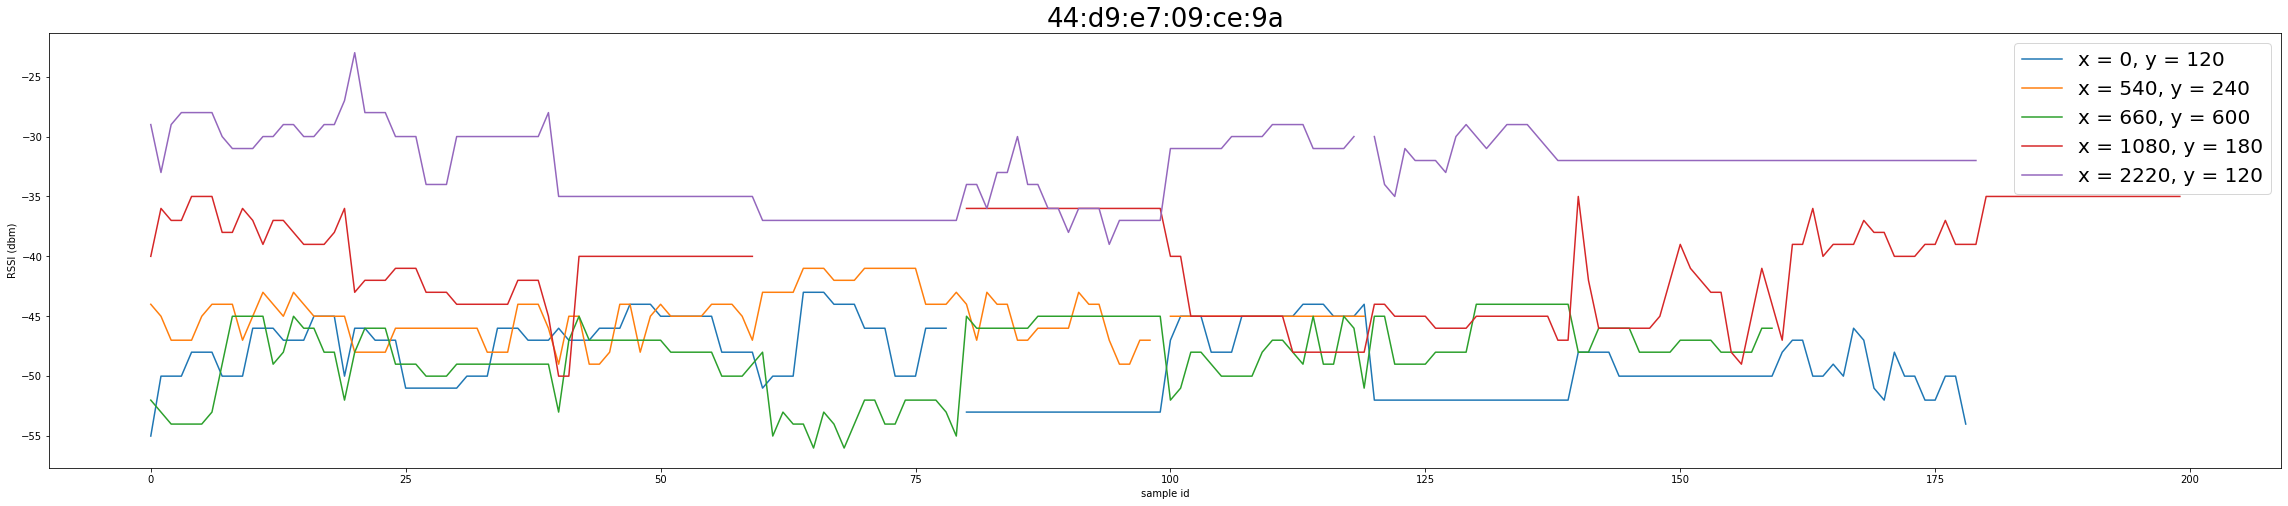

In [ ]:
plt.figure(figsize = (40,8))
plt.plot(np.array(y_0), label = 'x = 0, y = 120')
plt.plot(np.array(y_1), label = 'x = 540, y = 240')
plt.plot(np.array(y_2), label = 'x = 660, y = 600')
plt.plot(np.array(y_3), label = 'x = 1080, y = 180')
plt.plot(np.array(y_4), label = 'x = 2220, y = 120')
# plt.plot(y_4)
plt.legend(fontsize=20)
plt.title('44:d9:e7:09:ce:9a', fontsize = 26)
plt.xlabel('sample id')
plt.ylabel('RSSI (dbm)')
# plt.legend(y_1.columns)
# plt.legend(y_2.columns)
# plt.legend(y_3.columns)
# plt.legend(y_4.columns)

# Boxplot

In [ ]:
data1 = data.drop(['x', 'y'], axis = 1)

In [ ]:
data1 = data1.replace(-100, np.nan)

In [ ]:
data1.isnull().sum()

date_time                0
44:d9:e7:09:ca:66     8535
44:d9:e7:09:ca:cd     1812
44:d9:e7:09:ce:9a     1613
44:d9:e7:09:cf:39     4023
44:d9:e7:43:3d:fa    18655
46:d9:e7:09:ca:66    16852
46:d9:e7:09:ca:cd    13444
46:d9:e7:09:ce:9a    12531
46:d9:e7:09:cf:39    12806
46:d9:e7:43:3d:fa    23384
label                    0
dtype: int64

In [ ]:
data1 = data1.dropna(axis = 0)

In [ ]:
def boxplot(X):
  ap = list(X.drop(['date_time', 'label'], axis = 1))
  rssi = [X[i] for i in ap]
  plt.figure(figsize=(14,8))
  plt.boxplot(rssi);
  plt.xticks(range(1,len(ap)+1),ap, rotation=90)
  plt.title('Distribution of RSSI in Zone '+str(X.label.unique()[0]))
  plt.xlabel('mac address')
  plt.ylabel('RSSI (dbm)')
  plt.show()

In [ ]:
map = {'1': '44:d9:e7:09:ca:66', '2': '44:d9:e7:09:ca:cd', '3': '44:d9:e7:09:ce:9a', '4': '44:d9:e7:09:cf:39', '5':'44:d9:e7:43:3d:fa',
'6': '46:d9:e7:09:ca:66', '7': '46:d9:e7:09:ca:cd', '8': '46:d9:e7:09:ce:9a', '9':'46:d9:e7:09:cf:39', '10':'46:d9:e7:43:3d:fa'}

In [ ]:
def annotate_dict_in_plot(results, ax):
    string = ''
    for k, v in results.items():
        string += f'{k}: {v}\n'
    ax.annotate(
        string, 
        xy=(0.35, 0.35)
        )
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

fig, ax = plt.subplots(2, 1, sharex=True)
a = {'1':'sdflk234k3l2sdlvksdf', '2':'sdlfksdlf', '3':'sdflksldfksdfdnf'}
annotate_dict_in_plot(a, ax[1])

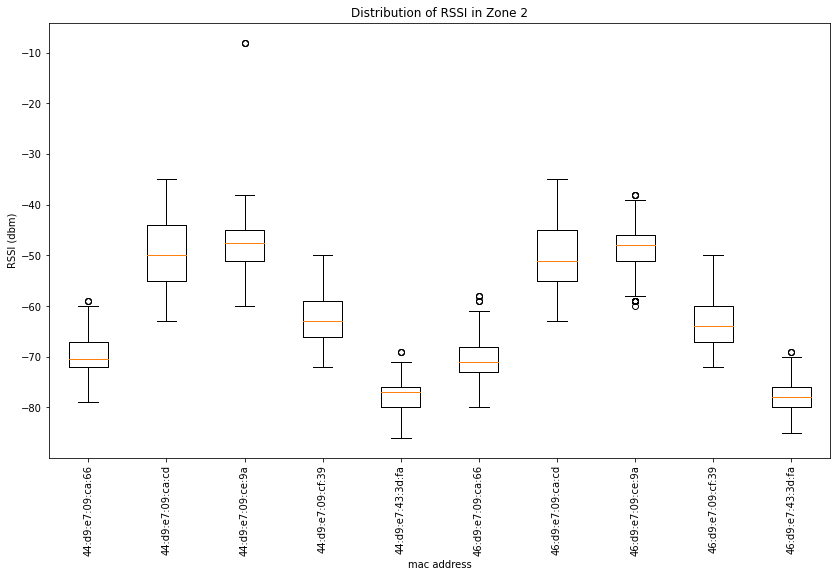

In [ ]:
boxplot(data1[data1['label'] == 2])

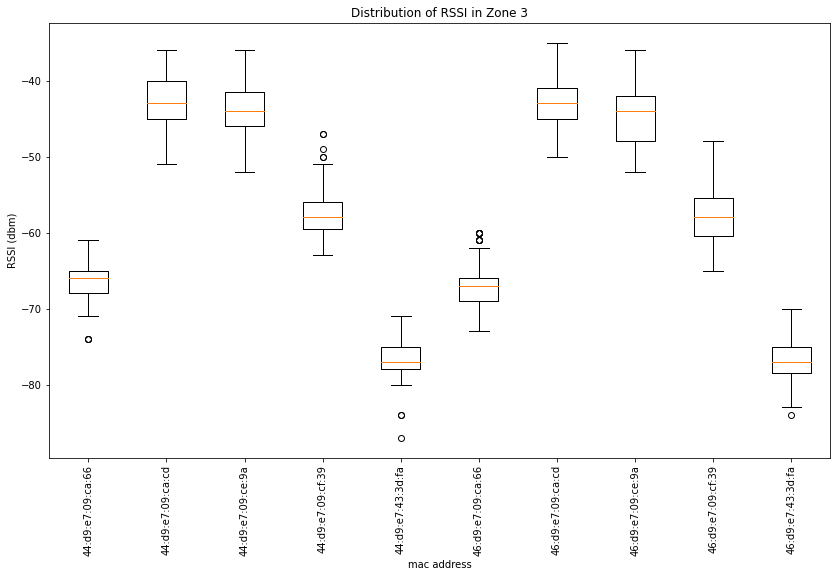

In [ ]:
boxplot(data1[data1['label'] == 3])

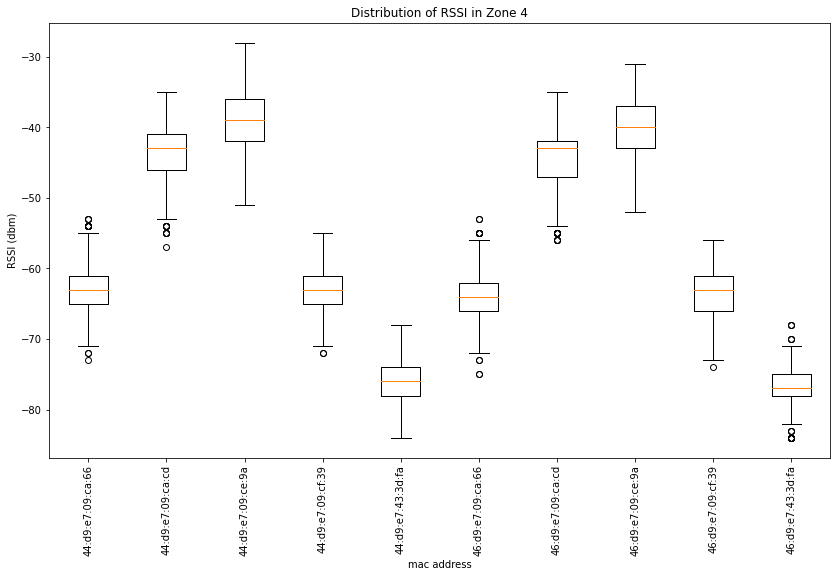

In [ ]:
boxplot(data1[data1['label'] == 4])

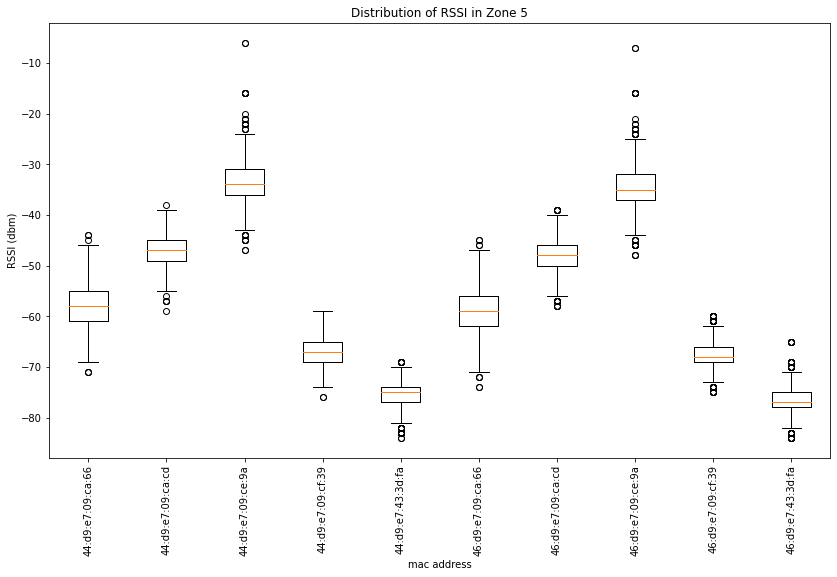

In [ ]:
boxplot(data1[data1['label'] == 5])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


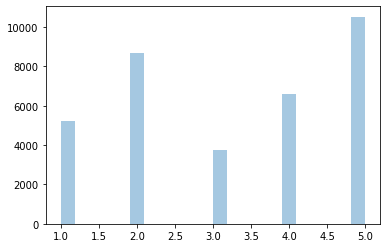

In [ ]:
sns.distplot(data[['label']],kde=False)

In [ ]:
data = data.replace(-100, np.nan)

In [ ]:
data.isnull().sum()

x                        0
y                        0
date_time                0
00:1f:fb:ea:46:d9     4467
44:d9:e7:09:ca:66     8535
44:d9:e7:09:ca:cd     1812
44:d9:e7:09:ce:9a     1613
44:d9:e7:09:cf:39     4023
44:d9:e7:43:3d:fa    18655
46:d9:e7:09:ca:66    16852
46:d9:e7:09:ca:cd    13444
46:d9:e7:09:ce:9a    12531
46:d9:e7:09:cf:39    12806
46:d9:e7:43:3d:fa    23384
label                    0
dtype: int64

Class=1, n=5240 (15.066%)
Class=3, n=3740 (10.753%)
Class=2, n=8680 (24.957%)
Class=4, n=6600 (18.976%)
Class=5, n=10520 (30.247%)


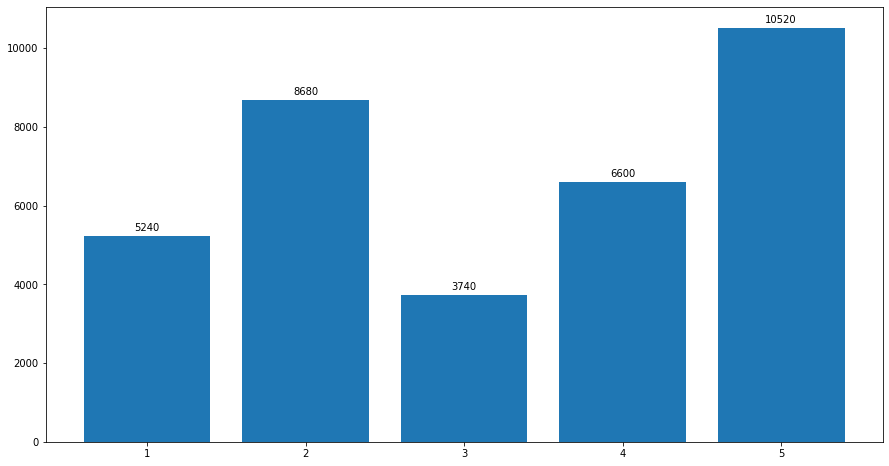

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# summarize distribution
counter = Counter(data['label'])
for k,v in counter.items():
	per = v / len(data['label']) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
      height = rect.get_height()
      ax.annotate(f'{height:.0f}',
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')
# plot the distribution
fig, ax = plt.subplots(figsize = (15,8))
bp = ax.bar(counter.keys(), counter.values())
autolabel(bp)
pyplot.show()

# map the data by date

In [ ]:
data_new = data

In [ ]:
data_new['Date']=data_new['date_time'].apply(lambda x : x.split()[0])

In [ ]:
data_new['day']=data_new['Date'].apply(lambda x : float(x.split('-')[2]))

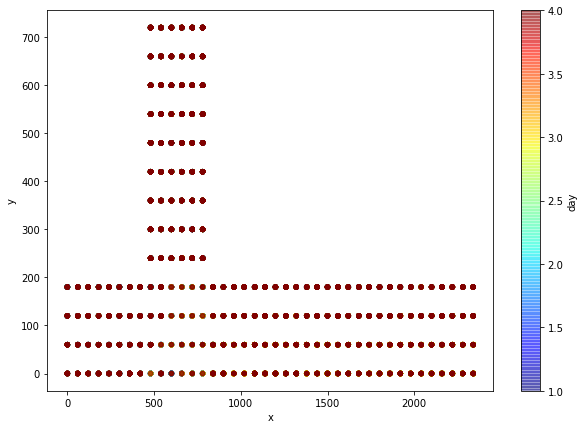

In [ ]:
#check how much of the information in each zone was collected by date
data.plot(kind="scatter", x="x", y="y", alpha=0.4, figsize=(10,7),
    c="day", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

# plot the correlations between the mac address feature

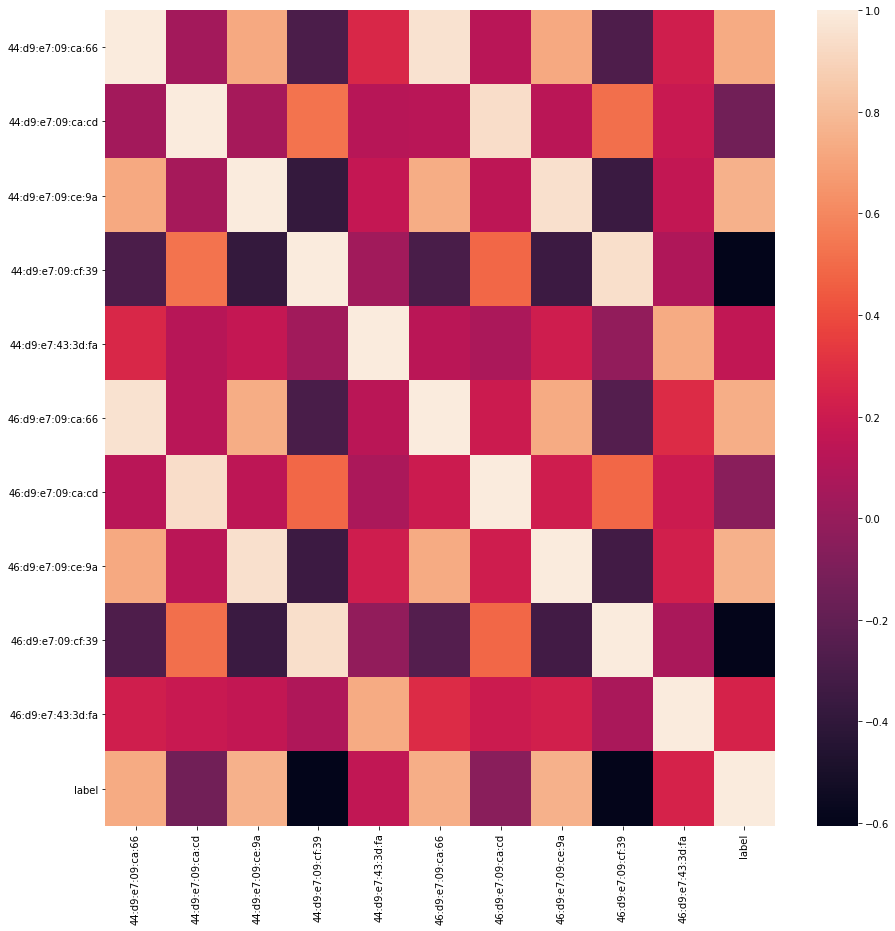

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(data.drop(['x', 'y', 'date_time'], axis = 1).corr())

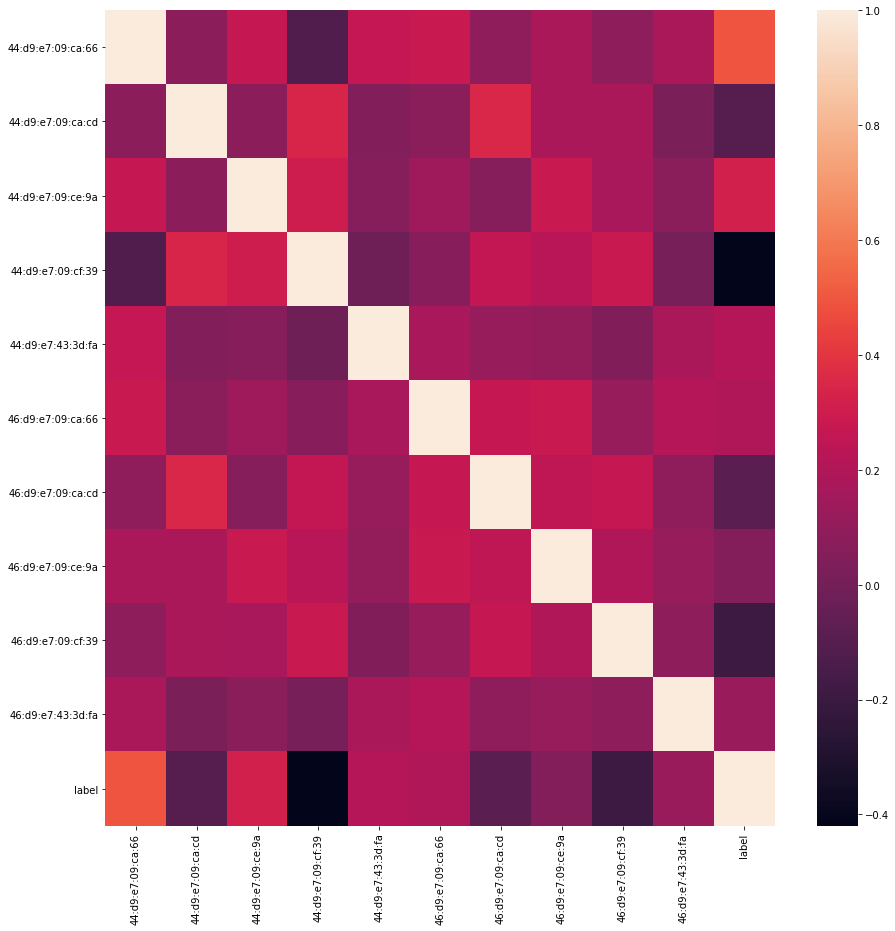

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(data.drop(['x', 'y', 'date_time'], axis = 1).corr())

# plot the histograms of the attributes

In [ ]:
data.columns

Index(['x', 'y', 'date_time', '44:d9:e7:09:ca:66', '44:d9:e7:09:ca:cd',
       '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39', '44:d9:e7:43:3d:fa',
       '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:cd', '46:d9:e7:09:ce:9a',
       '46:d9:e7:09:cf:39', '46:d9:e7:43:3d:fa', 'label'],
      dtype='object')

In [ ]:
data = data.replace(-100, np.nan)

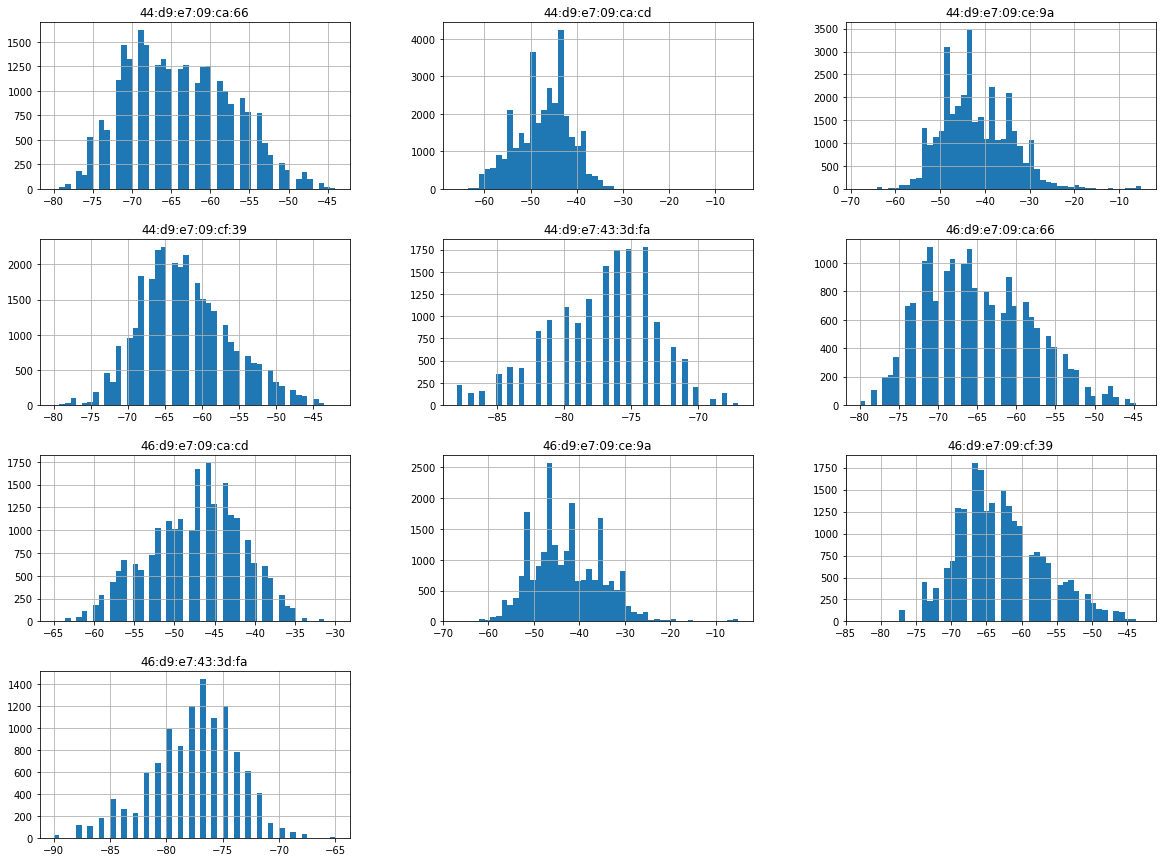

In [ ]:
data.iloc[:, 3:-1].hist(bins=50, figsize=(20,15))
plt.show()

# changes in RSSI of mac address

In [ ]:
columns = list(data.columns)
columns_ap = [item for item in columns if item[3:5]=='d9' or item == 'date_time']
X = data[columns_ap]
y = data[['x','y']]
df_test = pd.concat([X, y], axis=1)
df_test = df_test.set_index(df_test['date_time'])
df_test = df_test.sort_index()
date_time = pd.to_datetime(df_new['date_time'])
df_new = df_test
df_new['month'] = date_time.dt.month
df_new['day'] = date_time.dt.day
df_new = df_new[df_new['month']==8]
p = df_new[df_new['day']==3]
q = df_new[df_new['day']==4]
df = pd.concat([p,q], ignore_index= True).drop_duplicates()

In [ ]:
df_test.columns

Index(['date_time', '44:d9:e7:09:ca:66', '44:d9:e7:09:ca:c7',
       '44:d9:e7:09:ca:cd', '44:d9:e7:09:cd:e1', '44:d9:e7:09:ce:21',
       '44:d9:e7:09:ce:49', '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39',
       '44:d9:e7:43:3d:fa', '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:c7',
       '46:d9:e7:09:ca:cd', '46:d9:e7:09:cd:e1', '46:d9:e7:09:ce:21',
       '46:d9:e7:09:ce:49', '46:d9:e7:09:ce:9a', '46:d9:e7:09:cf:39',
       '46:d9:e7:43:3d:fa', 'x', 'y', 'month', 'day'],
      dtype='object')

In [ ]:
data.describe()

,00:1f:fb:ea:46:d9,3a:f6:43:0d:98:00,44:d9:e7:09:ca:66,44:d9:e7:09:ca:c7,44:d9:e7:09:ca:cd,44:d9:e7:09:cd:e1,44:d9:e7:09:ce:21,44:d9:e7:09:ce:49,44:d9:e7:09:ce:9a,44:d9:e7:09:cf:39,44:d9:e7:43:3d:fa,46:d9:e7:09:ca:66,46:d9:e7:09:ca:c7,46:d9:e7:09:ca:cd,46:d9:e7:09:cd:e1,46:d9:e7:09:ce:21,46:d9:e7:09:ce:49,46:d9:e7:09:ce:9a,46:d9:e7:09:cf:39,46:d9:e7:43:3d:fa,b8:76:3f:5a:77:4f,x,y
count,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000
mean,-68.945566,-93.023751,-71.072426,-99.766463,-47.849337,-99.911264,-99.968349,-99.965749,-43.104944,-63.610092,-88.442151,-78.016820,-99.792202,-60.164322,-99.900815,-99.969878,-99.972324,-55.866667,-71.230734,-91.565291,-99.990673,1014.223242,216.544343
std,15.824957,14.547705,15.425990,1.965759,9.852448,1.090402,0.788422,0.759901,10.763477,9.806064,11.983651,17.703029,1.805658,23.180244,1.137228,0.818052,0.687534,24.877078,16.451760,11.163729,0.272169,628.486583,215.548156
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,0.000000,0.000000
25%,-71.000000,-100.000000,-73.000000,-100.000000,-51.000000,-100.000000,-100.000000,-100.000000,-48.000000,-67.000000,-100.000000,-100.000000,-100.000000,-61.000000,-100.000000,-100.000000,-100.000000,-56.000000,-72.000000,-100.000000,-100.000000,540.000000,60.000000
50%,-64.000000,-100.000000,-67.000000,-100.000000,-46.000000,-100.000000,-100.000000,-100.000000,-43.000000,-63.000000,-100.000000,-71.000000,-100.000000,-50.000000,-100.000000,-100.000000,-100.000000,-47.000000,-66.000000,-100.000000,-100.000000,780.000000,120.000000
75%,-59.000000,-100.000000,-61.000000,-100.000000,-43.000000,-100.000000,-100.000000,-100.000000,-37.000000,-59.000000,-76.000000,-64.000000,-100.000000,-44.000000,-100.000000,-100.000000,-100.000000,-40.000000,-61.000000,-79.000000,-100.000000,1500.000000,360.000000
max,-35.000000,-25.000000,-44.000000,-76.000000,-5.000000,-83.000000,-73.000000,-79.000000,-5.000000,-42.000000,-67.000000,-44.000000,-76.000000,-30.000000,-83.000000,-73.000000,-79.000000,-5.000000,-43.000000,-65.000000,-90.000000,2340.000000,720.000000


In [ ]:
data[data['44:d9:e7:09:ca:cd'] == -5]

,date_time,00:1f:fb:ea:46:d9,3a:f6:43:0d:98:00,44:d9:e7:09:ca:66,44:d9:e7:09:ca:c7,44:d9:e7:09:ca:cd,44:d9:e7:09:cd:e1,44:d9:e7:09:ce:21,44:d9:e7:09:ce:49,44:d9:e7:09:ce:9a,44:d9:e7:09:cf:39,44:d9:e7:43:3d:fa,46:d9:e7:09:ca:66,46:d9:e7:09:ca:c7,46:d9:e7:09:ca:cd,46:d9:e7:09:cd:e1,46:d9:e7:09:ce:21,46:d9:e7:09:ce:49,46:d9:e7:09:ce:9a,46:d9:e7:09:cf:39,46:d9:e7:43:3d:fa,b8:76:3f:5a:77:4f,x,y
30,2021-08-02 09:03:42,-56.0,-66.0,-67.0,-100.0,-5.0,-100.0,-100.0,-100.0,-45.0,-48.0,-100.0,-68.0,-100.0,-100.0,-100.0,-100.0,-100.0,-45.0,-100.0,-100.0,-100.0,0,0
33,2021-08-02 09:03:42,-56.0,-66.0,-67.0,-100.0,-5.0,-100.0,-100.0,-100.0,-45.0,-48.0,-100.0,-70.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-51.0,-100.0,-100.0,0,0


In [ ]:
def boxplot_date(X):
  date = list(X['date_time'])
  rssi = [X[X['date_time'] == i]['44:d9:e7:09:ca:66'] for i in date]
  plt.figure(figsize=(14,8))
  plt.boxplot(rssi);
  plt.xticks(range(1,len(date)+1),date, rotation=90)
  plt.title('Distribution of RSSI for 44:d9:e7:09:ca:66  in special point')
  plt.show()
  plt.show()

In [ ]:
date = list(X['date_time'])
date[0]
df_test[df_test['date_time'] == date[0]]['44:d9:e7:09:ca:66']

date_time
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
2021-08-01 10:33:27   -100.0
Name: 44:d9:e7:09:ca:66, dtype: float64

In [ ]:
columns = list(data.columns)
columns_ap = [item for item in columns if item[3:5]=='d9' or item == 'date_time']
X = data[columns_ap]
y = data[['x','y']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   x                  34780 non-null  int64  
 1   y                  34780 non-null  int64  
 2   date_time          34780 non-null  object 
 3   00:1f:fb:ea:46:d9  30520 non-null  float64
 4   3a:f6:43:0d:98:00  5340 non-null   float64
 5   44:d9:e7:09:ca:66  31640 non-null  float64
 6   44:d9:e7:09:ca:c7  2740 non-null   float64
 7   44:d9:e7:09:ca:cd  33880 non-null  float64
 8   44:d9:e7:09:cd:e1  1140 non-null   float64
 9   44:d9:e7:09:ce:21  560 non-null    float64
 10  44:d9:e7:09:ce:49  360 non-null    float64
 11  44:d9:e7:09:ce:9a  33840 non-null  float64
 12  44:d9:e7:09:cf:39  32600 non-null  float64
 13  44:d9:e7:43:3d:fa  25760 non-null  float64
 14  46:d9:e7:09:ca:66  27620 non-null  float64
 15  46:d9:e7:09:ca:c7  2300 non-null   float64
 16  46:d9:e7:09:ca:cd  287

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


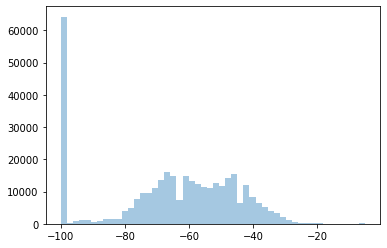

In [ ]:
X_stack = data.drop(['date_time','x','y'] , axis =1 ).stack(dropna=False)
sns.distplot(X_stack.dropna(),kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Highest RSSI per measurement')

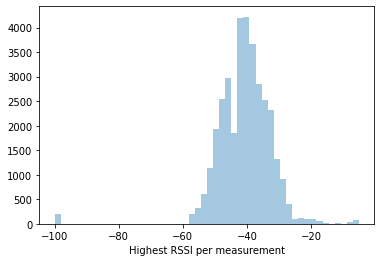

In [ ]:
X_ap_max = (data.drop(['date_time','x','y'] , axis =1 )
           .max(axis = 1,skipna=True)
           .dropna())

fig, ax = plt.subplots(1,1)

sns.distplot(X_ap_max.dropna(), ax = ax,kde=False)
ax.set_xlabel("Highest RSSI per measurement")

In [ ]:
# Proportion of out of range values
sum(X_stack.isnull() == 0)/len(X_stack)

0.46416933650976205

In [ ]:
X_stack.isnull() == 0

0      00:1f:fb:ea:46:d9     True
       3a:f6:43:0d:98:00     True
       44:d9:e7:09:ca:66    False
       44:d9:e7:09:ca:c7    False
       44:d9:e7:09:ca:cd     True
                            ...  
34779  46:d9:e7:09:ce:49    False
       46:d9:e7:09:ce:9a    False
       46:d9:e7:09:cf:39     True
       46:d9:e7:43:3d:fa    False
       b8:76:3f:5a:77:4f     True
Length: 730380, dtype: bool

In [ ]:
print("Skewness of entire RSSI distribution", X_stack.skew())
print("Skewness of max RSSI distribution", X_ap_max.skew())

Skewness of entire RSSI distribution -0.41829684420310376
Skewness of max RSSI distribution -1.6782772489745275


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Number of APs in range')

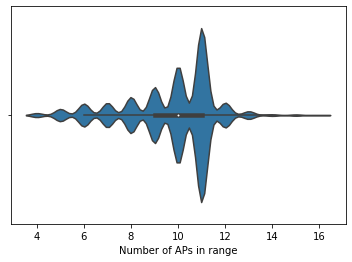

In [ ]:
aps_in_range = (data.drop(['date_time','x','y'] , axis =1 )
                 .notnull()
                 .sum(axis = 1))

fig, ax = plt.subplots(1,1)

sns.violinplot(aps_in_range, ax = ax)
ax.set_xlabel("Number of APs in range")

# disterbution of each mac address in plan

In [ ]:
data.columns

Index(['x', 'y', 'date_time', '44:d9:e7:09:ca:66', '44:d9:e7:09:ca:cd',
       '44:d9:e7:09:ce:9a', '44:d9:e7:09:cf:39', '44:d9:e7:43:3d:fa',
       '46:d9:e7:09:ca:66', '46:d9:e7:09:ca:cd', '46:d9:e7:09:ce:9a',
       '46:d9:e7:09:cf:39', '46:d9:e7:43:3d:fa', 'label'],
      dtype='object')

In [ ]:
data.isnull().sum()

x                        0
y                        0
date_time                0
44:d9:e7:09:ca:66     8535
44:d9:e7:09:ca:cd     1812
44:d9:e7:09:ce:9a     1613
44:d9:e7:09:cf:39     4023
44:d9:e7:43:3d:fa    18655
46:d9:e7:09:ca:66    16852
46:d9:e7:09:ca:cd    13444
46:d9:e7:09:ce:9a    12531
46:d9:e7:09:cf:39    12806
46:d9:e7:43:3d:fa    23384
label                    0
dtype: int64

In [ ]:
data = data.replace(-100, np.nan)

In [ ]:
dat_grouped = data.groupby(['y','x']).mean().round(0)

In [ ]:
dat_grouped.head()

44:d9:e7:09:ca:66  44:d9:e7:09:ca:cd  ...  46:d9:e7:43:3d:fa  label
y x                                          ...                          
0 0                -70.0              -40.0  ...              -80.0      1
  60               -71.0              -41.0  ...              -81.0      1
  120              -71.0              -42.0  ...              -80.0      1
  180              -72.0              -40.0  ...              -80.0      1
  240              -71.0              -42.0  ...              -82.0      1

[5 rows x 11 columns]

In [ ]:
dat_grouped['44:d9:e7:09:ce:9a']

y    x  
0    0     -49.0
     60    -48.0
     120   -51.0
     180   -48.0
     240   -47.0
            ... 
720  540   -50.0
     600   -50.0
     660   -50.0
     720   -52.0
     780   -52.0
Name: 44:d9:e7:09:ce:9a, Length: 214, dtype: float64

In [ ]:
dat = dat_grouped['44:d9:e7:09:ce:9a'].unstack()
dat1 = dat_grouped['44:d9:e7:09:ca:cd'].unstack()

In [ ]:
dat.head()

x,0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1440,1500,1560,1620,1680,1740,1800,1860,1920,1980,2040,2100,2160,2220,2280,2340
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-55.0,-56.0,-55.0,-55.0,-55.0,-55.0,-56.0,-57.0,-59.0,-58.0,-61.0,-61.0,-62.0,-61.0,-60.0,-60.0,-59.0,-61.0,-64.0,-64.0,-64.0,-63.0,-64.0,-65.0,-66.0,-66.0,-68.0,-68.0,-66.0,-67.0,-66.0,-66.0,-65.0,-68.0,-66.0,-68.0,-69.0,-68.0,-68.0,-67.0
60,-55.0,-55.0,-55.0,-55.0,-56.0,-54.0,-57.0,-59.0,-60.0,-58.0,-61.0,-60.0,-63.0,-64.0,-61.0,-61.0,-60.0,-62.0,-62.0,-64.0,-63.0,-65.0,-66.0,-65.0,-65.0,-66.0,-64.0,-66.0,-67.0,-68.0,-67.0,-67.0,-66.0,-68.0,-69.0,-69.0,-67.0,-67.0,-67.0,-67.0
120,-54.0,-53.0,-52.0,-56.0,-56.0,-54.0,-54.0,-56.0,-53.0,-54.0,-59.0,-59.0,-60.0,-63.0,-64.0,-63.0,-63.0,-62.0,-62.0,-63.0,-64.0,-65.0,-63.0,-65.0,-65.0,-65.0,-65.0,-68.0,-66.0,-68.0,-67.0,-68.0,-68.0,-70.0,-71.0,-70.0,-67.0,-68.0,-69.0,-68.0
180,-52.0,-51.0,-53.0,-53.0,-56.0,-52.0,-55.0,-56.0,-57.0,-56.0,-59.0,-58.0,-60.0,-61.0,-61.0,-64.0,-62.0,-60.0,-63.0,-65.0,-62.0,-64.0,-67.0,-66.0,-65.0,-67.0,-67.0,-66.0,-66.0,-68.0,-68.0,-68.0,-68.0,-69.0,-69.0,-69.0,-68.0,-68.0,-68.0,-68.0
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-55.0,-55.0,-54.0,-57.0,-57.0,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


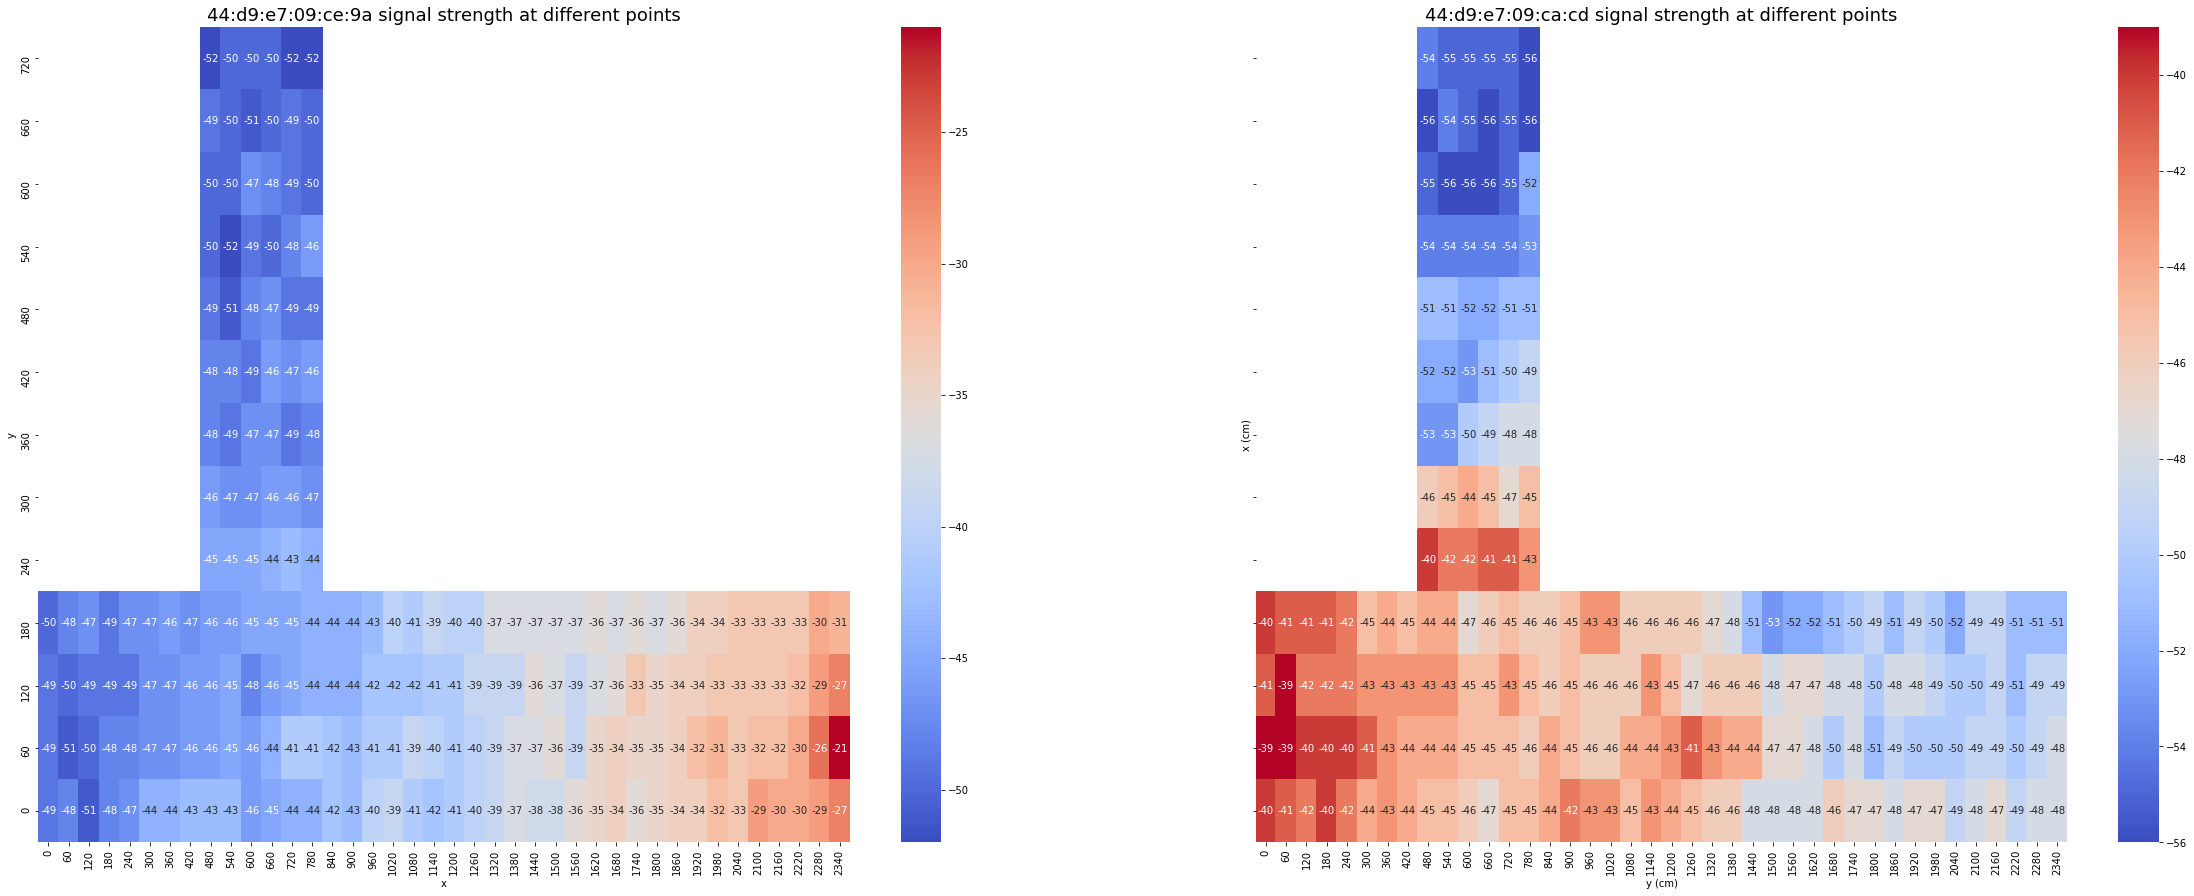

In [ ]:
import seaborn as sns
import pandas as pd

# fill data


fig , ax = plt.subplots(1, 2, figsize = (40, 15), sharey=True)
# pivot = dat.pivot(index='y', columns='x', values='44:d9:e7:09:ca:66')
dat = dat.sort_values(by="y",ascending=False)
sns.heatmap(dat,annot=True, cmap = 'coolwarm',ax=ax[0])
ax[0].set_title('44:d9:e7:09:ce:9a signal strength at different points', fontsize = 18)
dat1 = dat1.sort_values(by="y",ascending=False)
sns.heatmap(dat1,annot=True, cmap = 'coolwarm',ax=ax[1])
ax[1].set_title('44:d9:e7:09:ca:cd signal strength at different points', fontsize = 18)
plt.xlabel('y (cm)')
plt.ylabel('x (cm)')
plt.show()